In [2]:
%pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip list

Package                              Version          Editable project location
------------------------------------ ---------------- -------------------------------------------------------------
absl-py                              2.1.0
action-msgs                          1.2.1
action-tutorials-interfaces          0.20.3
action-tutorials-py                  0.20.3
actionlib-msgs                       4.2.3
aenum                                3.1.15
ament-cmake-test                     1.3.8
ament-copyright                      0.12.10
ament-cppcheck                       0.12.10
ament-cpplint                        0.12.10
ament-flake8                         0.12.10
ament-index-python                   1.4.0
ament-lint                           0.12.10
ament-lint-cmake                     0.12.10
ament-package                        0.14.0
ament-pep257                         0.12.10
ament-uncrustify                     0.12.10
ament-xmllint                        0.12.10
angles  

In [1]:
import tensorflow as tf
import os


2024-05-08 00:48:38.880306: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-08 00:48:38.882112: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 00:48:38.949598: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 00:48:39.238208: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 00:48:40.114919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [5]:
# This piece of code if for configuring gpu utilisation. I  don't have a dedicated gpu so i have this commented out.

# limit gpu consumption to avoid errors like 'out of memory error'
# gpus=tf.config.experimental.list_physical_devices('GPU')
# for unitGPU in gpus:
#     tf.config.experimental.set_memory_growth(unitGPU,True)

# gpus=tf.config.experimental.list_physical_devices('GPU')
# print(gpus)

In [2]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [3]:
train_data_dir='PCOS_Train'
os.listdir(train_data_dir)

['healthy', 'unhealthy']

In [4]:
healthyDirectory=os.listdir(os.path.join(train_data_dir,os.listdir(train_data_dir)[0]))
healthyDirectory

['23image0030.jpg',
 'image0285.jpg',
 'image1912.jpg',
 'image3008.jpg',
 'image0204.jpg',
 '90image46.jpg',
 'image0006.jpg',
 '10image17.jpg',
 'image3060.jpg',
 '96image6.jpg',
 'image3377.jpg',
 'image2934.jpg',
 '25image62.jpg',
 'image3139.jpg',
 'image2928.jpg',
 '12image51.jpg',
 'image3011.jpg',
 'image3242.jpg',
 '27image13.jpg',
 'normal_14.jpg',
 'image2809.jpg',
 'normal_40.jpg',
 'image2954.jpg',
 '16image55.jpg',
 'image2368.jpg',
 'image0198.jpg',
 'image3350.jpg',
 'image1178.jpg',
 'image2729.jpg',
 'image2870.jpg',
 'image0325.jpg',
 'image3133.jpg',
 'image2687.jpg',
 'normal_17.jpg',
 'image3074.jpg',
 'image2921.jpg',
 'pco_1.jpg',
 'image3249.jpg',
 'normal_8.jpg',
 'image2604.jpg',
 'image3461.jpg',
 'image3316.jpg',
 'image1660.jpg',
 'image3222.jpg',
 '93image33.jpg',
 'image0264.jpg',
 '93image3.jpg',
 'image3551.jpg',
 '97image16.jpg',
 '154image24.jpg',
 'image2105.jpg',
 'image0751.jpg',
 '118image1.jpg',
 'image2246.jpg',
 'image3278.jpg',
 'image2175.jp

In [ ]:

# augmentedHealthyImages=dataGeneratorObject.flow_from_directory(
#     healthyDirectory,
#     target_size=(300,300),
#     batch_size=32,
#     class_mode='binary'
# )

In [5]:

imageExts=['jpeg','jpg','bmp','png']
for imageDir in os.listdir(train_data_dir):
    for image in os.listdir(os.path.join(train_data_dir,imageDir)):
        imgPath=os.path.join(train_data_dir, imageDir,image)
        try: 
            img=cv2.imread(imgPath)
            ext=imghdr.what(imgPath)
            if ext not in imageExts:
                print('not a compatible file format')
                os.remove(imgPath)
        except Exception as e:
            print('some problem')

[[[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 ...

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[10 10 10]
  [10 10 10]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]]
(300, 300, 3)


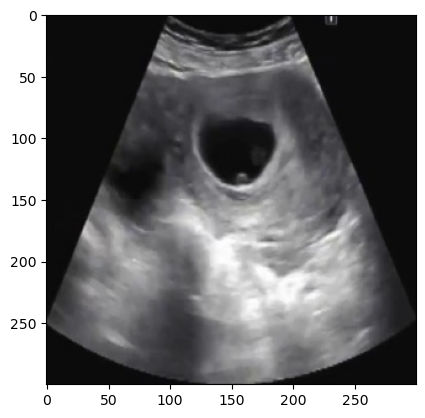

In [6]:
# an example of how the images are inside the folders healthy and unhealthy
exampleImage=cv2.imread(os.path.join(train_data_dir,'healthy', '1image40.jpg'))
print(exampleImage)
print(exampleImage.shape)
# plt.imshow(exampleImage)
plt.imshow(cv2.cvtColor(exampleImage, cv2.COLOR_BGR2RGB))


In [ ]:
tf.data.Dataset??

In [44]:
# trainData=tf.keras.utils.image_dataset_from_directory('PCOS_Train',
#                                                       image_size=(256,256), 
#                                                       batch_size=32,
#                                                       label_mode='categorical',
#                                                       seed=123,
#                                                       shuffle=True)

trainData=tf.keras.utils.image_dataset_from_directory('PCOS_Train')
dataIterator=trainData.as_numpy_iterator()
batch=dataIterator.next()
batch



Found 3200 files belonging to 2 classes.


(array([[[[1.90000000e+01, 2.30000000e+01, 2.40000000e+01],
          [1.34218750e+01, 1.74218750e+01, 1.84218750e+01],
          [1.03515625e+01, 1.43515625e+01, 1.53515625e+01],
          ...,
          [4.00000000e+00, 3.00000000e+00, 8.00000000e+00],
          [4.00000000e+00, 3.00000000e+00, 8.00000000e+00],
          [4.00000000e+00, 3.00000000e+00, 8.00000000e+00]],
 
         [[1.01054688e+01, 1.41054688e+01, 1.51054688e+01],
          [1.18776855e+01, 1.58776855e+01, 1.68776855e+01],
          [1.37256165e+01, 1.77256165e+01, 1.87256165e+01],
          ...,
          [4.68750000e-02, 3.51562500e-02, 4.04687500e+00],
          [4.68750000e-02, 3.51562500e-02, 4.04687500e+00],
          [4.68750000e-02, 3.51562500e-02, 4.04687500e+00]],
 
         [[3.13671875e+00, 7.13671875e+00, 8.13671875e+00],
          [1.04652710e+01, 1.44652710e+01, 1.54652710e+01],
          [1.88441467e+01, 2.28441467e+01, 2.38441467e+01],
          ...,
          [1.96093750e+00, 9.80468750e-01, 5.9609

In [45]:
trainData

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [46]:
# each batch is of size 32 and has 2 parts. the first part is the images and the second part is the labels
batch[0]
batch[0].shape
# batch[1]

(32, 256, 256, 3)

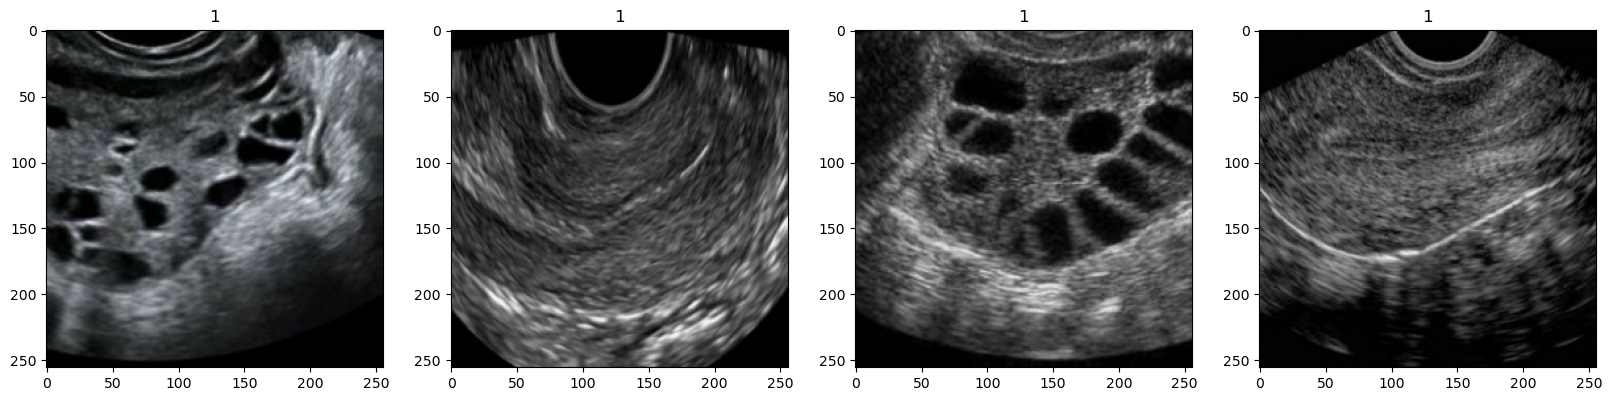

In [47]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    # print(os.path.abspath(img))

In [48]:
for i, class_name in enumerate(trainData.class_names):
    print(f"Label for class {class_name}: {i}")

Label for class healthy: 0
Label for class unhealthy: 1


In [49]:
trainData=trainData.map(lambda x,y: (x/255,y))

In [50]:
scaledIterator=trainData.as_numpy_iterator()

In [51]:
scaledIterator.next()[0].max()

1.0

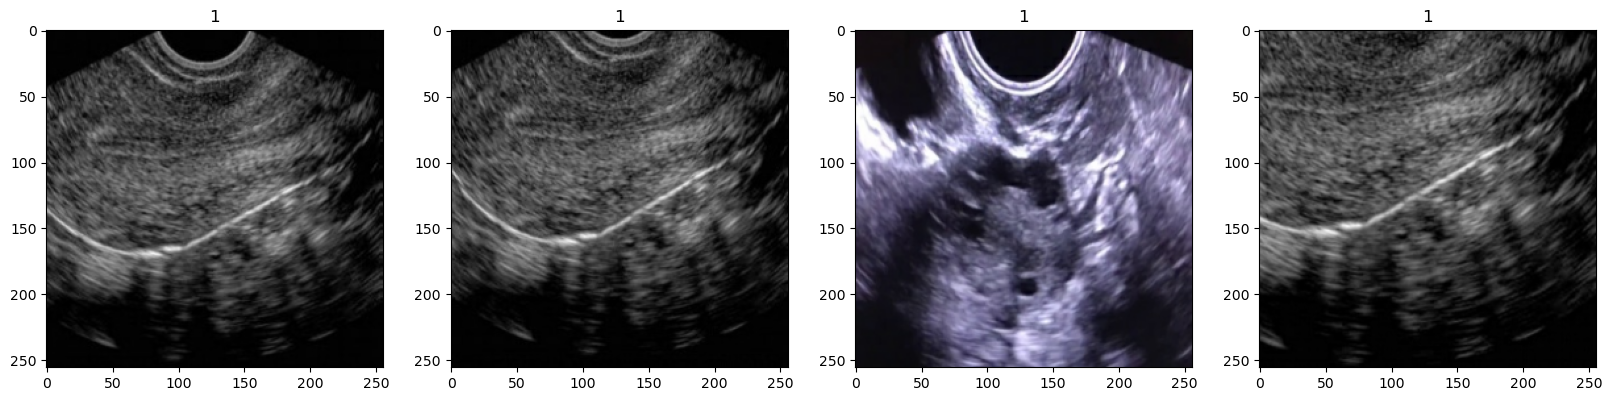

In [52]:
batch=scaledIterator.next()
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    # print(os.path.abspath(img))

In [53]:
batch[0].max()
batch[0].min()

0.0

In [54]:
len(trainData)

100

In [55]:
trainSize=int(len(trainData)*.7)
valSize=int(len(trainData)*.2)+1
testSize=int(len(trainData)*.1)+1

In [56]:
valSize
trainSize
testSize

11

In [57]:
# train=trainData.take(trainSize)
# val=trainData.skip(trainSize).take(valSize)
# test=trainData.skip(trainSize+valSize).take(testSize)

train=trainData.take(len(trainData))
val=trainData.take(valSize)
test=trainData.take(testSize)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


In [40]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
# type(train)
# len(train)
# train[0]

In [28]:
# trainingImages=[]
# trainingLabels=[]
# validationImages=[]
# validationLabels=[]

# for image, label in train:
#     trainingImages.append(image.numpy())
#     trainingLabels.append(label.numpy())

# trainingImages=np.array(trainingImages)
# trainingLabels=np.array(trainingLabels)

2024-04-24 00:50:17.110394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:



# dataGeneratorObject=ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=18,
#     zoom_range=18,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'

# )

# augmentedTrain=[]
# for img in trainingImages:
#     augmentedImg=dataGeneratorObject.random_transform(img)
#     augmentedTrain.append(augmentedImg)

# augmentedTrain=np.array(augmentedTrain)
# augmentedTrainGenerator=tf.data.dataset.from_tensor_slices(augmentedTrain, trainingLabels)
# augmentedTrainGenerator=augmentedTrainGenerator.shuffle(buffer_size=len(augmentedTrain)).batch(32)

# for image, label in val:
#     validationImages.append(image.numpy())
#     validationLabels.append(label.numpy())

# validationImages=np.array(validationImages)
# validationLabels=np.array(validationLabels)

# augmentedVal=[]
# for img in validationImages:
#     augmentedValidationImg=dataGeneratorObject.random_transform(img)
#     augmentedVal.append(augmentedValidationImg)

# augmentedVal=np.array(augmentedVal)
# augmentedValGenerator=tf.data.dataset.from_tensor_slices(augmentedVal, validationLabels)
# augmentedValGenerator=augmentedValGenerator.shuffle(buffer_size=len(augmentedVal)).batch(32)


# augmentedTrainGenerator=dataGeneratorObject.flow(train)
# augmentedValidateGenerator=dataGeneratorObject.flow(val)


In [59]:
# base_model=EfficientNetB0(weights='imagenet', include_top=False)
# model=Sequential([base_model, GlobalAveragePooling2D(), Dense(512, activation='relu'), Dense(1, activation='sigmoid')])

model=Sequential()

# model=tf.keras.Model(inputs, outputs)

In [ ]:
MaxPooling2D??

In [62]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/satyarth/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [28]:
# we can use different optimizers. I have used adam but there are several available. In order to check the list of optimizers available with tensorflow run the below line of code. When you put a dot after optimizers it will show the list available

# tf.optimizers.

In [63]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
logDirectory='logs'

In [66]:
tensorboardCallback=tf.keras.callbacks.TensorBoard(log_dir=logDirectory)

In [67]:
# hist=model.fit(augmentedTrainGenerator, epochs=15, validation_data=augmentedValidateGenerator, callbacks=[tensorboardCallback])
hist=model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboardCallback])

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 330ms/step - accuracy: 0.6886 - loss: 0.5942 - val_accuracy: 0.7232 - val_loss: 0.5075
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 354ms/step - accuracy: 0.7366 - loss: 0.4925 - val_accuracy: 0.7515 - val_loss: 0.4661
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 342ms/step - accuracy: 0.7649 - loss: 0.4509 - val_accuracy: 0.7783 - val_loss: 0.4343
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 389ms/step - accuracy: 0.7826 - loss: 0.4191 - val_accuracy: 0.8080 - val_loss: 0.3667
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.8137 - loss: 0.3726

2024-05-08 01:37:06.989450: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 492ms/step - accuracy: 0.8137 - loss: 0.3726 - val_accuracy: 0.7827 - val_loss: 0.4131
Epoch 6/40


2024-05-08 01:37:09.690058: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - accuracy: 0.8133 - loss: 0.3618 - val_accuracy: 0.8438 - val_loss: 0.3271
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 605ms/step - accuracy: 0.8392 - loss: 0.3272 - val_accuracy: 0.8155 - val_loss: 0.3540
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 395ms/step - accuracy: 0.8526 - loss: 0.3075 - val_accuracy: 0.8557 - val_loss: 0.3001
Epoch 9/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 349ms/step - accuracy: 0.8752 - loss: 0.2643 - val_accuracy: 0.8512 - val_loss: 0.3206
Epoch 10/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.8754 - loss: 0.2485 - val_accuracy: 0.8244 - val_loss: 0.3260
Epoch 11/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 386ms/step - accuracy: 0.8787 - loss: 0.2465 - val_accuracy: 0.8557 - val_loss: 0.3248
Epoch 12/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 542ms/step - accuracy: 0.8962 - loss: 0.2247 - val_accuracy: 0.8631 - val_loss: 0.3532
Epoch 13/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 420ms/step - accuracy: 0.9081 - loss: 0.2127 -

2024-05-08 01:46:12.539389: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 582ms/step - accuracy: 0.9557 - loss: 0.1158 - val_accuracy: 0.8810 - val_loss: 0.3289
Epoch 19/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.9455 - loss: 0.1308

2024-05-08 01:47:57.087371: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 509ms/step - accuracy: 0.9455 - loss: 0.1308 - val_accuracy: 0.8824 - val_loss: 0.2770
Epoch 20/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.9525 - loss: 0.1147

2024-05-08 01:48:51.662870: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 541ms/step - accuracy: 0.9525 - loss: 0.1147 - val_accuracy: 0.9256 - val_loss: 0.2316
Epoch 21/40


2024-05-08 01:48:56.909021: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.9485 - loss: 0.1254

2024-05-08 01:49:46.706744: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 531ms/step - accuracy: 0.9485 - loss: 0.1254 - val_accuracy: 0.9182 - val_loss: 0.2052
Epoch 22/40


2024-05-08 01:49:51.018664: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 373ms/step - accuracy: 0.9555 - loss: 0.1141 - val_accuracy: 0.9211 - val_loss: 0.1750
Epoch 23/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 476ms/step - accuracy: 0.9612 - loss: 0.0946 - val_accuracy: 0.9360 - val_loss: 0.1624
Epoch 24/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.9681 - loss: 0.0840

2024-05-08 01:52:09.899153: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 551ms/step - accuracy: 0.9681 - loss: 0.0840 - val_accuracy: 0.8884 - val_loss: 0.3509
Epoch 25/40


2024-05-08 01:52:13.840761: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.9541 - loss: 0.1216

2024-05-08 01:53:21.712443: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 739ms/step - accuracy: 0.9541 - loss: 0.1215 - val_accuracy: 0.9152 - val_loss: 0.2174
Epoch 26/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9625 - loss: 0.1069 - val_accuracy: 0.9122 - val_loss: 0.2485
Epoch 27/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 313ms/step - accuracy: 0.9519 - loss: 0.1084 - val_accuracy: 0.9241 - val_loss: 0.1810
Epoch 28/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.9506 - loss: 0.1179 - val_accuracy: 0.9554 - val_loss: 0.1054
Epoch 29/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.9632 - loss: 0.0953 - val_accuracy: 0.9509 - val_loss: 0.1077
Epoch 30/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.9639 - loss: 0.0898 - val_accuracy: 0.9509 - val_loss: 0.1112
Epoch 31/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - accuracy: 0.9687 - loss: 0.0797 - val_accuracy: 0.9286 - val_loss: 0.1818
Epoch 32/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.9631 - loss: 0.0967 

In [68]:
hist.history

{'accuracy': [0.7103124856948853,
  0.7515624761581421,
  0.7784374952316284,
  0.7903125286102295,
  0.8146874904632568,
  0.8293750286102295,
  0.8459374904632568,
  0.8643749952316284,
  0.8728125095367432,
  0.8853124976158142,
  0.8918750286102295,
  0.9024999737739563,
  0.9112499952316284,
  0.9228125214576721,
  0.9259374737739563,
  0.9306250214576721,
  0.942187488079071,
  0.9509375095367432,
  0.9434375166893005,
  0.9559375047683716,
  0.9515625238418579,
  0.956250011920929,
  0.9593750238418579,
  0.9659374952316284,
  0.9599999785423279,
  0.9587500095367432,
  0.957812488079071,
  0.956250011920929,
  0.9637500047683716,
  0.9628124833106995,
  0.9706249833106995,
  0.96875,
  0.96875,
  0.9693750143051147,
  0.9709374904632568,
  0.973437488079071,
  0.9762499928474426,
  0.9746875166893005,
  0.96875,
  0.9728124737739563],
 'loss': [0.5590842962265015,
  0.47596171498298645,
  0.43314841389656067,
  0.40193280577659607,
  0.36761245131492615,
  0.34312933683395386,


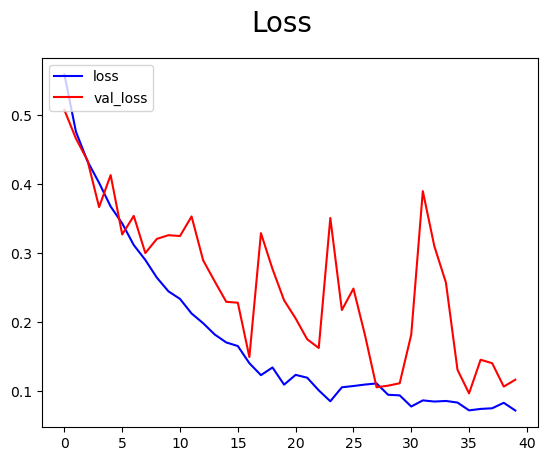

In [69]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

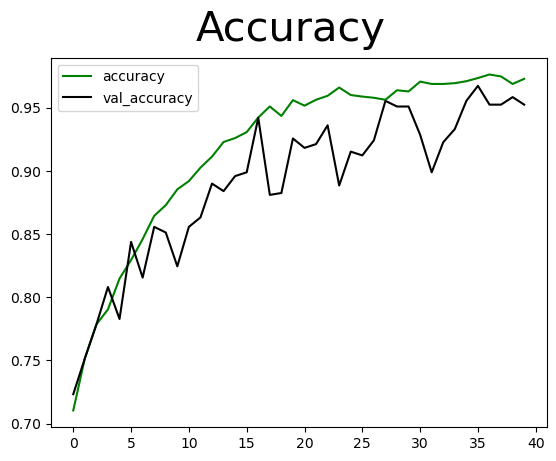

In [70]:
secondFig=plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='black', label='val_accuracy')
secondFig.suptitle("Accuracy", fontsize=30)
plt.legend(loc="upper left")
plt.show()

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
precision=Precision()
recall=Recall()
accuracy=BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yPred=model.predict(x)
    precision.update_state(y,yPred)
    recall.update_state(y, yPred)
    accuracy.update_state(y, yPred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


2024-05-08 02:04:47.465181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [74]:
print(f"Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}")

Precision:0.9513108730316162, Recall:1.0, Accuracy:0.9630681872367859
